<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules" data-toc-modified-id="Import-Modules-1">Import Modules</a></span></li><li><span><a href="#General-Outline" data-toc-modified-id="General-Outline-2">General Outline</a></span><ul class="toc-item"><li><span><a href="#Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?" data-toc-modified-id="Hypothesis:--Does-inclusion-of-consumer-confiden-index-(cci)-improve-model-prediction-score-for-sales?-2.1">Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?</a></span></li></ul></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-3">Import data</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-4">Data</a></span><ul class="toc-item"><li><span><a href="#Description-of-columns-and-values--" data-toc-modified-id="Description-of-columns-and-values---4.1">Description of columns and values -</a></span></li></ul></li><li><span><a href="#Consumer-Confidence-Data-Wrangling" data-toc-modified-id="Consumer-Confidence-Data-Wrangling-5">Consumer Confidence Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Consumer-Confidence-Data-from:-https://data.oecd.org/leadind/consumer-confidence-index-cci.htm" data-toc-modified-id="Consumer-Confidence-Data-from:-https://data.oecd.org/leadind/consumer-confidence-index-cci.htm-5.1">Consumer Confidence Data from: <a href="https://data.oecd.org/leadind/consumer-confidence-index-cci.htm" target="_blank">https://data.oecd.org/leadind/consumer-confidence-index-cci.htm</a></a></span></li></ul></li><li><span><a href="#Stores.csv-Data-Wrangling" data-toc-modified-id="Stores.csv-Data-Wrangling-6">Stores.csv Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#Summary:" data-toc-modified-id="Summary:-6.1">Summary:</a></span></li></ul></li><li><span><a href="#Train.csv-Data-Wrangling" data-toc-modified-id="Train.csv-Data-Wrangling-7">Train.csv Data Wrangling</a></span></li><li><span><a href="#Features.csv-Data-Wrangling" data-toc-modified-id="Features.csv-Data-Wrangling-8">Features.csv Data Wrangling</a></span></li><li><span><a href="#df_train-and-Weekly_Sales" data-toc-modified-id="df_train-and-Weekly_Sales-9">df_train and Weekly_Sales</a></span><ul class="toc-item"><li><span><a href="#Plot-of-Weekly_Sales-for-individual-stores" data-toc-modified-id="Plot-of-Weekly_Sales-for-individual-stores-9.1">Plot of Weekly_Sales for individual stores</a></span></li><li><span><a href="#Plot-of-Weekly_Sales-for-departments-within-a-store" data-toc-modified-id="Plot-of-Weekly_Sales-for-departments-within-a-store-9.2">Plot of Weekly_Sales for departments within a store</a></span></li></ul></li></ul></div>

# Import Modules

In [225]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

# General Outline

## Hypothesis:  Does inclusion of consumer confiden index (cci) improve model prediction score for sales?

Procedure:

1. Build and test model without cci data.
2. Build and test model with cci data.
3.  Compare and note differences between with/without cci data.

Download data

1.  consumer price index:  

four dataframes: 
- df_stores 
- df_features
- df_test
- df_train

# Import data

In [226]:
df_stores = pd.read_csv('./capstone 3 project data/stores.csv')

In [227]:
df_features = pd.read_csv('./capstone 3 project data/features.csv')

In [228]:
df_test = pd.read_csv('./capstone 3 project data/test.csv')

In [229]:
df_train = pd.read_csv('./capstone 3 project data/train.csv')

In [230]:
# https://data.oecd.org/leadind/consumer-confidence-index-cci.htm
df_cci = pd.read_csv('./capstone 3 project data/us_consumer_confidence.csv')

# Data

## Description of columns and values - 

from kaggle.com-

 - stores.csv

This file contains anonymized information about the 45 stores, indicating the type and size of store.

 - train.csv

This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields:

Store - the store number <br>
Dept - the department number <br>
Date - the week <br>
Weekly_Sales -  sales for the given department in the given store <br>
IsHoliday - whether the week is a special holiday week <br>

 - test.csv

This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

 - features.csv

This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields:

Store - the store number <br>
Date - the week <br>
Temperature - average temperature in the region <br>
Fuel_Price - cost of fuel in the region <br>
MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA. <br>
CPI - the consumer price index <br>
Unemployment - the unemployment rate <br>
IsHoliday - whether the week is a special holiday week <br>
For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data):

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13 <br>
Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13 <br>
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13 <br>
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13 <br>

# Consumer Confidence Data Wrangling

## Consumer Confidence Data from: https://data.oecd.org/leadind/consumer-confidence-index-cci.htm

In [231]:
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCATION    308 non-null    object 
 1   INDICATOR   308 non-null    object 
 2   SUBJECT     308 non-null    object 
 3   MEASURE     308 non-null    object 
 4   FREQUENCY   308 non-null    object 
 5   TIME        308 non-null    object 
 6   Value       308 non-null    float64
 7   Flag Codes  0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 19.4+ KB


In [232]:
df_cci.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2008-09,97.19665,NaN
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2008-10,96.88356,NaN
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2008-11,96.59681,NaN
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2008-12,96.42375,NaN
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2009-01,96.33321,NaN


In [233]:
# check for null/nan values
df_cci['LOCATION'].isna().sum()

0

In [234]:
# convert TIME data type format to datetime
df_cci.TIME = pd.to_datetime(df_cci.TIME)

In [235]:
# filter location for USA. values
df_cci[df_cci['LOCATION'] == 'USA']
df_cci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   LOCATION    308 non-null    object        
 1   INDICATOR   308 non-null    object        
 2   SUBJECT     308 non-null    object        
 3   MEASURE     308 non-null    object        
 4   FREQUENCY   308 non-null    object        
 5   TIME        308 non-null    datetime64[ns]
 6   Value       308 non-null    float64       
 7   Flag Codes  0 non-null      float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 19.4+ KB


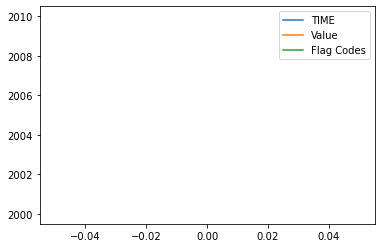

In [236]:
# filter for time period. drop all columns except 'VALUE'
df_ = df_cci.loc['2010-2-1':'2012-10-1']
df_.drop(columns = ['SUBJECT','LOCATION','INDICATOR','MEASURE','FREQUENCY','Flag Codes'])
df_.plot();

# Stores.csv Data Wrangling

## Summary:

Examine Type, Size values

1.  There are three store types.  There are 22 'A' Type stores, 17 'B' Type stores, and 6 'C' Type Stores.

2.  Grouping the data by store type and computing median of each group

    A type store median size: 202406.0 <br>
    B type store median size: 114533.0 <br>
    C type store median size: 39910.0

In [237]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [238]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [239]:
#  inspect df_stores for missing, nan values.  no missing values
df_stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [240]:
# "Type" Feature unique value counts
df_stores.Type.value_counts()

A    22
B    17
C     6
Name: Type, dtype: int64

In [241]:
print(df_stores[df_stores['Type'] == 'A'].describe())
print(df_stores[df_stores['Type'] == 'B'].describe())
print(df_stores[df_stores['Type'] == 'C'].describe())

           Store           Size
count  22.000000      22.000000
mean   22.227273  177247.727273
std    13.078269   49392.621098
min     1.000000   39690.000000
25%    11.500000  155840.750000
50%    25.000000  202406.000000
75%    32.750000  203819.000000
max    41.000000  219622.000000
           Store           Size
count  17.000000      17.000000
mean   18.352941  101190.705882
std    11.028039   32371.137916
min     3.000000   34875.000000
25%    10.000000   93188.000000
50%    17.000000  114533.000000
75%    23.000000  123737.000000
max    45.000000  140167.000000
           Store          Size
count   6.000000      6.000000
mean   39.000000  40541.666667
std     5.215362   1304.145033
min    30.000000  39690.000000
25%    37.250000  39745.000000
50%    40.000000  39910.000000
75%    42.750000  40774.000000
max    44.000000  42988.000000


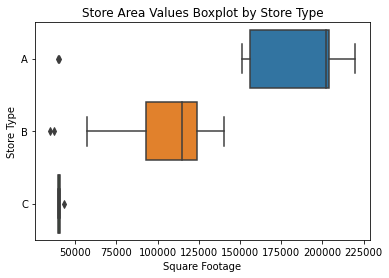

<Figure size 432x288 with 0 Axes>

In [242]:
# Create a figure and axes
fig, ax = plt.subplots()

# Create a boxplot
sns.boxplot(data=df_stores,
         y='Type',
         x='Size')

# Create a more descriptive x axis label
ax.set(xlabel="Square Footage", ylabel='Store Type')

# Add the title
ax.set_title("Store Area Values Boxplot by Store Type")


plt.show()
plt.clf();

In [243]:
# each store type group shows some overlap with over store types in size values distribution.  
# there is a large difference between mean and median values for Type "A" store sizes.

print("A type store median size: {0} \nB type store median size: {1} \nC type store median size: {2}".format(
    df_stores[df_stores['Type'] == 'A']['Size'].median(), df_stores[df_stores['Type'] == 'B']['Size'].median(),
    df_stores[df_stores['Type'] == 'C']['Size'].median()))

A type store median size: 202406.0 
B type store median size: 114533.0 
C type store median size: 39910.0


# Train.csv Data Wrangling

Summary:

1.  81 unique departments found throughout WalMart stores
2.  Weekly_Sales


In [244]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [245]:
# Convert Date to datetime.  reindex using "date" feature
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.set_index('Date', inplace = True)
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [205]:
# check info.  check for missing/nan values.  no missing/nan values found.
df_train.info()
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 13.3 MB


Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [212]:
# Unique 'Dept' values?
df_train.Dept.unique()

# How many unique 'Dept' values?
df_train.Dept.nunique()

# set 'Dept' dtype to category
df_train.Dept = df_train.Dept.astype('category')

In [213]:
# value counts for each Dept
df_train.Dept.value_counts()

1     6435
10    6435
38    6435
21    6435
67    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: Dept, Length: 81, dtype: int64

In [246]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [269]:
list_store = df_train.Store.unique()
list_dept = df_train.Dept.unique()

In [301]:
# which departments are found in a store?  

def dept_count(store_num):
    return df_train[df_train['Store'] == store_num]['Dept'].nunique()



In [302]:
dept_count(1)

77

In [305]:
# for each store, how many departments are there?

for item in list_store:
    print("store {}: {} depts".format(item,dept_count(item)))
    

store 1: 77 depts
store 2: 78 depts
store 3: 72 depts
store 4: 78 depts
store 5: 72 depts
store 6: 77 depts
store 7: 76 depts
store 8: 76 depts
store 9: 73 depts
store 10: 77 depts
store 11: 78 depts
store 12: 75 depts
store 13: 79 depts
store 14: 77 depts
store 15: 79 depts
store 16: 76 depts
store 17: 76 depts
store 18: 78 depts
store 19: 79 depts
store 20: 78 depts
store 21: 77 depts
store 22: 76 depts
store 23: 77 depts
store 24: 77 depts
store 25: 77 depts
store 26: 76 depts
store 27: 78 depts
store 28: 77 depts
store 29: 77 depts
store 30: 64 depts
store 31: 76 depts
store 32: 77 depts
store 33: 63 depts
store 34: 78 depts
store 35: 74 depts
store 36: 63 depts
store 37: 62 depts
store 38: 63 depts
store 39: 75 depts
store 40: 77 depts
store 41: 77 depts
store 42: 62 depts
store 43: 61 depts
store 44: 62 depts
store 45: 74 depts


In [215]:
order_dept = df_train.Dept.value_counts().sort_values().keys().to_list()

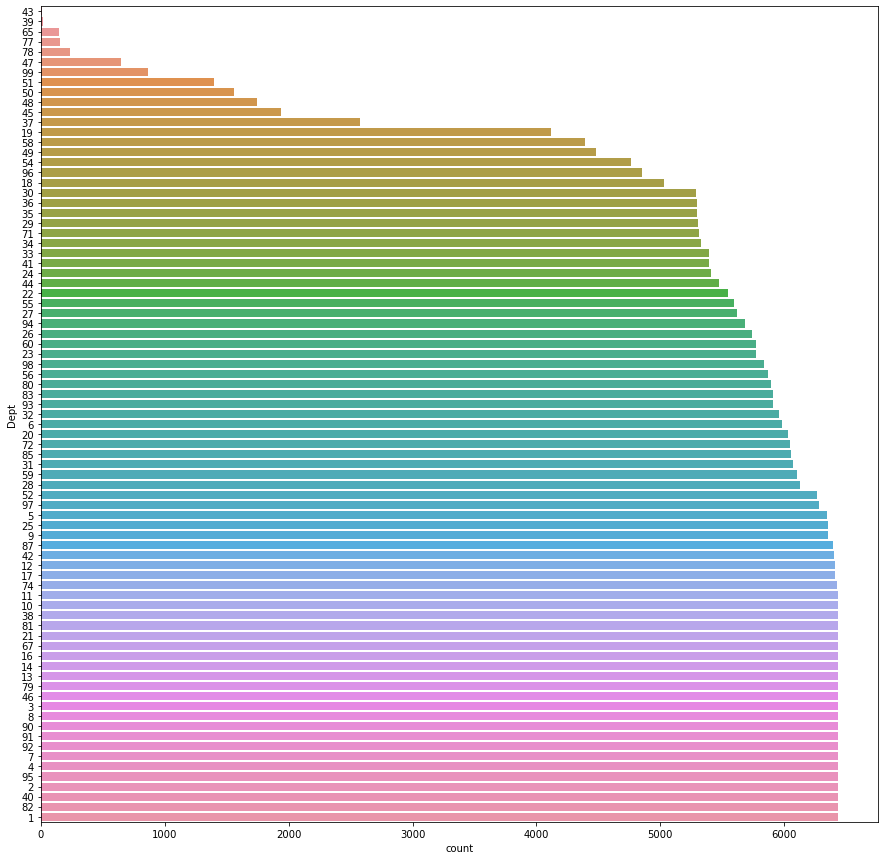

<Figure size 432x288 with 0 Axes>

In [216]:
# Show a countplot 
fig, ax = plt.subplots(figsize=(15,15))
sns.countplot(data=df_train,
         y="Dept", order=order_dept)

plt.show();
plt.clf()

In [223]:
# Group by Store.  Sum Sales Over Entire Time Period
pd.DataFrame(df_train.groupby(['Store','Dept'])['Weekly_Sales'].sum())

Weekly_Sales
Store Dept              
1     1       3219405.18
      2       6592598.93
      3       1880518.36
      4       5285874.09
      5       3468885.58
...                  ...
45    95      7564151.83
      96            5.94
      97       924775.55
      98        75767.27
      99             NaN

[3645 rows x 1 columns]

In [175]:
# - Code Example - 

# Create the base figure
fig = go.Figure()

# Loop through the species
for species in ['Adelie', 'Chinstrap', 'Gentoo']:
  # Add a bar chart trace
  fig.add_trace(go.Bar(x=islands,
    # Set the appropriate y subset and name
    y=penguins_grouped[penguins_grouped.Species == species]['Count'],
    name=species))
# Show the figure
fig.show()


# species subplots example

fig = make_subplots(rows = 3, cols=1, shared_xaxes=True, shared_yaxes='columns',
                   subplot_titles = ['setosa', 'versicolor', 'virginica'],
                   row_heights = (50,50,50))

row_num = 1

for variety in df['species'].unique():
    # filter df for specific species
    df_ = df[df.species == variety]
    # add scatter of petal_width vs petal_length
    fig.add_trace(go.Scatter(x=df_['petal_width'], y=df_['petal_length'], name = variety, mode ='markers'),
    # position the trace             
    row=row_num, col = 1)
    row_num +=1
    # axes
    fig.update_layout({'xaxis': {'title' : {'text':'Petal Length'}},
                 'yaxis': {'title' : {'text':'Count'}}})
                  

    

# show the plot

fig.show()



NameError: name 'islands' is not defined

In [ ]:
df_subset = df_train[df_train['Store'] == 1]
#df_subset[df_subset['Dept'] == 1]
#df_subset[df_subset['Dept'] == 1].Weekly_Sales

In [ ]:
# Simplified plot of Store 1, Dept 1 Weekly_Sales

fig = go.Figure()

fig.add_trace(go.Scatter(x=df_subset['Date'], y = df_subset[df_subset['Dept']==1].Weekly_Sales,
                         mode = 'markers'))

fig.show()

In [ ]:
# For Store 1, plot Weekly Sales for all departments.

df_subset = df_train[df_train['Store'] == 1]

# Create the base figure
fig = go.Figure()

# Loop through the Dept
for value in df_subset['Dept'].unique():
    # Add a line chart trace
    fig.add_trace(go.Scatter(x=df_subset['Date'], y = df_subset[df_subset['Dept']==value].Weekly_Sales,
                             name = str(value), mode = 'markers'))
                
fig.show()


# Features.csv Data Wrangling

In [ ]:
df_features.head()

In [ ]:
df_features.info()

In [ ]:
df_features['Date'] = pd.to_datetime(df_features['Date'])
df_features = df_features.set_index('Date', inplace = True)

In [147]:
df_features

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...
2013-06-28,45,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
2013-07-05,45,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
2013-07-12,45,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False


In [131]:
# Percentage of values for each features that are missing
df_features.isna().sum()/8190 * 100

Store            0.000000
Date             0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       50.769231
MarkDown2       64.334554
MarkDown3       55.885226
MarkDown4       57.704518
MarkDown5       50.549451
CPI              7.142857
Unemployment     7.142857
IsHoliday        0.000000
dtype: float64

In [132]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [133]:
df_features[df_features.MarkDown1.notna()]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


# df_train and Weekly_Sales

Procedure:

1.  For each store, plot Weekly Sales over the time.
    a.  Within each store, plot the Weekly_Sales of each Dept over time.

In [134]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
# Initial look at Weekly_Sales data.  For each store, total sales of all departments over period.  
# Rank stores in order of increasing sales

df_train.groupby('Store').sum().sort_values('Weekly_Sales')

## Plot of Weekly_Sales for individual stores

In [135]:
df_train['Dept'].unique()
len(df_train['Dept'].unique())

81

In [136]:
df_train[df_train['Store'] == 1].sort_values('Dept')

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
92,1,1,2011-11-11,18689.54,False
93,1,1,2011-11-18,19050.66,False
94,1,1,2011-11-25,20911.25,True
95,1,1,2011-12-02,25293.49,False
...,...,...,...,...,...
10220,1,99,2011-12-23,1860.00,False
10221,1,99,2011-12-30,400.00,True
10222,1,99,2012-02-03,330.00,False
10215,1,99,2011-09-02,20.00,False


In [137]:
df_train[df_train['Store'] == 1]['Dept'].unique()
len(df_train[df_train['Store'] == 1]['Dept'].unique())

77

In [138]:
# Store #1 Weekly_Sales by Dept

store = df_train[df_train['Store'] == 1].sort_values('Dept')

# Filter Store 1 by Dept 1

store_ = store[store['Dept'] == 1]

# Plot Weekly Sales for Store 1 Dept 1

fig = px.scatter(data_frame=store_, x='Date',
                 y='Weekly_Sales', size='Weekly_Sales', color='IsHoliday')
#,
#                                   # Add columns to the hover information
#                   hover_data=['sepal_length',
#                               'sepal_width', 'petal_width'],
#                   # Add bold variable in hover information
#                   hover_name='species')

fig.update_layout(legend_title_text = "Store 1 Dept 1 Weekly Sales")
fig.update_xaxes(title_text = "Date")

fig.show()

In [139]:
fig = px.scatter(data_frame=df, x='petal_length',
                 y='petal_width', size='sepal_length', color='species',
                                   # Add columns to the hover information
                   hover_data=['sepal_length',
                               'sepal_width', 'petal_width'],
                   # Add bold variable in hover information
                   hover_name='species')

fig.update_layout(legend_title_text = "Iris Petal Length Histogram")
fig.update_xaxes(title_text = "Petal Length")

NameError: name 'df' is not defined

In [140]:
# Interactive 

@interact
def show_weeks_with_sales_more_than(column='Store', x=5000, column_='Dept', y=54):
    return df_train.sort_values(column, column_)


#df_train.groupby('Store').sum().sort_values('Weekly_Sales')

#df_train.loc[:,df_train[column] > x, df_train[column_] == y]

#@interact
#def show_articles_more_than(column='claps', x=5000):
#    return df.loc[df[column] > x]

interactive(children=(Text(value='Store', description='column'), IntSlider(value=5000, description='x', max=15…

## Plot of Weekly_Sales for departments within a store